          FechaHora Temperatura
0  2024-02-01T00:00        None
1  2024-02-01T01:00        None
2  2024-02-01T02:00        None
3  2024-02-01T03:00        None
4  2024-02-01T04:00        None

--- Completitud ---
FechaHora        0
Temperatura    120
dtype: int64

--- Unicidad ---
Registros duplicados: 0

--- Consistencia ---
Temperaturas menores a -50 o mayores a 60 °C: 0      False
1      False
2      False
3      False
4      False
       ...  
115    False
116    False
117    False
118    False
119    False
Name: Temperatura, Length: 120, dtype: bool


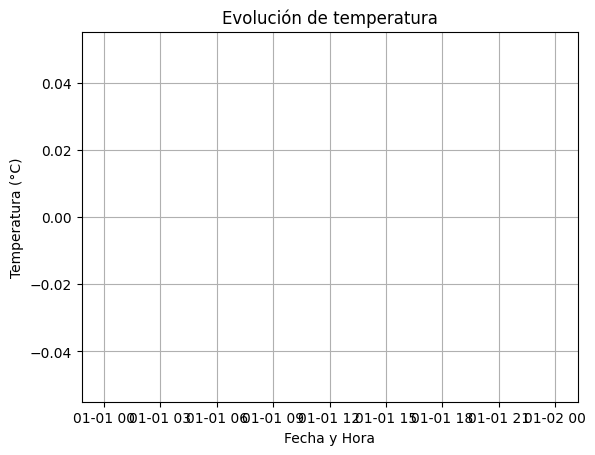

In [ ]:
# 📦 Importar librerías necesarias
import pandas as pd
import requests
import matplotlib.pyplot as plt

# 🟡 Paso 1: Obtener datos desde API Open-Meteo (gratuita)
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": -12.0464,       # Latitud de Lima, Perú (puedes cambiarlo)
    "longitude": -77.0428,      # Longitud de Lima, Perú
    "hourly": "temperature_2m",
    "start_date": "2024-02-01",
    "end_date": "2024-02-05",
    "timezone": "America/Lima"
}

response = requests.get(url, params=params)
data = response.json()

# 🟡 Paso 2: Convertir a DataFrame
df = pd.DataFrame({
    "FechaHora": data['hourly']['time'],
    "Temperatura": data['hourly']['temperature_2m']
})

print(df.head())

# 🟡 Paso 3: Indicadores básicos de Calidad de Datos

## 1️⃣ Completitud
print("\n--- Completitud ---")
print(df.isnull().sum())

## 2️⃣ Unicidad
print("\n--- Unicidad ---")
print(f"Registros duplicados: {df.duplicated().sum()}")

## 3️⃣ Consistencia (valores fuera de rango físico)
print("\n--- Consistencia ---")
print(f"Temperaturas menores a -50 o mayores a 60 °C: {(df['Temperatura'] < -50) | (df['Temperatura'] > 60).sum()}")

# 🟡 Paso 4: Visualización simple
plt.plot(pd.to_datetime(df['FechaHora']), df['Temperatura'])
plt.xlabel("Fecha y Hora")
plt.ylabel("Temperatura (°C)")
plt.title("Evolución de temperatura")
plt.grid(True)
plt.show()


# Indicadores de calidad 

### Unicidad

No se encontraron valores repetidos.

### Consistencia

Todos los valores encontrados tienen consistencia debido a que no hay valores fuera del rango entre -50 y 60 grados

